# Часть A

## Импорт библиотек

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

In [210]:
data = pd.read_csv("Датасет клиентов (5 задание).csv", encoding = "cp1251")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact
0,58,management,married,tertiary,no,2143,yes,no,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown


## Посмотрим на наборы уникальных значений в каждом столбце

In [211]:
for column in data.columns:
    print("-------------------------")
    print("Col: ", column, "; uniq: ", data[column].unique())
    #print(data[data[column].isna()])

-------------------------
Col:  age ; uniq:  ['58' '44' '33' '47' '35' '28' '42' '43' '41' '29' '53' '57' '51' '45'
 '60' '56' '32' '25' '40' '39' '52' '46' '36' '49' '59' '37' '50' '54'
 '55' '48' '24' '38' '31' '30' '27' '34' '23' '26' '61' '22' '21' '20'
 '66' '62' '83' '75' '67' '70' '65' '68' '64' '69' '72' '71' '19' '76'
 '85' '63' '90' '82' '73' '74' '78' '80' '94' '79' '77'
 '47;unemployed;married;primary;no;2290;yes;no;cellular' '86' '95' '81'
 '18' '89' '84' '87' '92' '93' '88']
-------------------------
Col:  job ; uniq:  ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student' 'sef-employed' 'Їа®бвЁвҐ ¬Ґ\xadп' nan]
-------------------------
Col:  marital ; uniq:  ['married' 'single' 'divorced' nan]
-------------------------
Col:  education ; uniq:  ['tertiary' 'secondary' 'unknown' 'primary' nan]
-------------------------
Col:  default ; uniq:  ['no' 'yes' nan]
----------------------

In [212]:
data.isna().value_counts()

age    job    marital  education  default  balance  housing  loan   contact
False  False  False    False      False    False    False    False  False      45210
       True   True     True       True     True     True     True   True           1
dtype: int64

## Видно, что в наборах значений есть ошибки заполнения таблицы.
## 1) В столбце "Age" присутствуют(ет) некорректно прочитанная строка
## 2) В столбце "Job" присутствует значене: Їа®бвЁвҐ ¬Ґ\xadп, которое после обработки декодером преобразуется в: "простите ме я" - вероятно, это фраза: "простите меня" - неизвестно, как и почему она оказалась в графе работа, но это ошибка.
## 3) Также в этом же столбце есть 'unknown' и 'nan', которые не дают информации о месте работы.
## 4) Также допущена ошибка в записи самозанятый: sef-employed, должно быть self-employed
## 5) admin. - неполная запись названия работы - лучше заменить на полное название
## 6) В столбцах job, marital, education, default, balance, housing, loan, contact, есть nan, которое не дает полезной информации 
## 7) В датасете единственная строка, в которой только nan

In [213]:
data[data["age"] == "47;unemployed;married;primary;no;2290;yes;no;cellular"]

,age,job,marital,education,default,balance,housing,loan,contact
31706,47;unemployed;married;primary;no;2290;yes;no;c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Строка с nan - та, которая была неправильно прочитана

In [214]:
data.isna().value_counts()

age    job    marital  education  default  balance  housing  loan   contact
False  False  False    False      False    False    False    False  False      45210
       True   True     True       True     True     True     True   True           1
dtype: int64

In [215]:
data_err = data[data["age"] == "47;unemployed;married;primary;no;2290;yes;no;cellular"]
curr_row = data_err.iloc[0][0]
ind = 0
#print(curr_row)
temp_row = curr_row.split(';')
#print(temp_row)
data_err.age.iloc[ind] = temp_row[0]
data_err.job.iloc[ind] = temp_row[1]
data_err.marital.iloc[ind] = temp_row[2]
data_err.education.iloc[ind] = temp_row[3]
data_err.default.iloc[ind] = temp_row[4]
data_err.balance.iloc[ind] = temp_row[5]
data_err.housing.iloc[ind] = temp_row[6]
data_err.loan.iloc[ind] = temp_row[7]
data_err.contact.iloc[ind] = temp_row[8]

print(data_err)
data[data["age"] == "47;unemployed;married;primary;no;2290;yes;no;cellular"] = data_err

      age         job  marital education default balance housing loan  \
31706  47  unemployed  married   primary      no    2290     yes   no   

        contact  
31706  cellular  


In [216]:
data[data["age"] == "47"][data["balance"] == '2290']

C:\Users\Dany\AppData\Local\Temp\ipykernel_20792\1238133630.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data["age"] == "47"][data["balance"] == '2290']


,age,job,marital,education,default,balance,housing,loan,contact
31706,47,unemployed,married,primary,no,2290,yes,no,cellular
32166,47,housemaid,married,tertiary,no,2290,no,no,cellular


## Видно, что теперь строка прочитана корректно. Проведем повторное исследование уникальных значений

In [217]:
for column in data.columns:
    print("-------------------------")
    print("Col: ", column, "; uniq: ", data[column].unique())
    #print(data[data[column].isna()])

-------------------------
Col:  age ; uniq:  ['58' '44' '33' '47' '35' '28' '42' '43' '41' '29' '53' '57' '51' '45'
 '60' '56' '32' '25' '40' '39' '52' '46' '36' '49' '59' '37' '50' '54'
 '55' '48' '24' '38' '31' '30' '27' '34' '23' '26' '61' '22' '21' '20'
 '66' '62' '83' '75' '67' '70' '65' '68' '64' '69' '72' '71' '19' '76'
 '85' '63' '90' '82' '73' '74' '78' '80' '94' '79' '77' '86' '95' '81'
 '18' '89' '84' '87' '92' '93' '88']
-------------------------
Col:  job ; uniq:  ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student' 'sef-employed' 'Їа®бвЁвҐ ¬Ґ\xadп']
-------------------------
Col:  marital ; uniq:  ['married' 'single' 'divorced']
-------------------------
Col:  education ; uniq:  ['tertiary' 'secondary' 'unknown' 'primary']
-------------------------
Col:  default ; uniq:  ['no' 'yes']
-------------------------
Col:  balance ; uniq:  ['2143' '29' '2' ... '8205' '14204' '16353']
-

## Более в столбцах нет значений nan. Исправим остальные ошибки

In [218]:
data_err = data[data["job"] == 'Їа®бвЁвҐ ¬Ґ\xadп']
print(data_err)
data_err.iloc[0, 1] = 'unknown'
data[data["job"] == 'Їа®бвЁвҐ ¬Ґ\xadп'] = data_err
print(data[data["job"] == 'unknown'].loc[26151])

      age            job  marital  education default balance housing loan  \
26151  33  Їа®бвЁвҐ ¬Ґ­п  married  secondary      no    1631     yes   no   

        contact  
26151  cellular  
age                 33
job            unknown
marital        married
education    secondary
default             no
balance           1631
housing            yes
loan                no
contact       cellular
Name: 26151, dtype: object


In [219]:
data_err = data[data["job"] == 'sef-employed']
print(data_err)
data_err.iloc[0, 1] = 'self-employed'
data[data["job"] == 'sef-employed'] = data_err
print(data[data["job"] == 'self-employed'].loc[23983])

      age           job  marital education default balance housing loan  \
23983  47  sef-employed  married   primary      no    1056      no   no   

         contact  
23983  telephone  
age                     47
job          self-employed
marital            married
education          primary
default                 no
balance               1056
housing                 no
loan                    no
contact          telephone
Name: 23983, dtype: object


In [220]:
data[data["job"] == 'admin.']

,age,job,marital,education,default,balance,housing,loan,contact
10,41,admin.,divorced,secondary,no,270,yes,no,unknown
11,29,admin.,single,secondary,no,390,yes,no,unknown
16,45,admin.,single,unknown,no,13,yes,no,unknown
25,44,admin.,married,secondary,no,-372,yes,no,unknown
32,60,admin.,married,secondary,no,39,yes,yes,unknown
...,...,...,...,...,...,...,...,...,...
45171,33,admin.,single,secondary,no,690,no,no,cellular
45173,36,admin.,single,tertiary,no,980,no,no,cellular
45176,54,admin.,married,secondary,no,66,yes,no,cellular
45177,36,admin.,divorced,secondary,no,1224,yes,no,cellular


In [221]:
data_err = data[data["job"] == 'admin.']
for ind in range(data_err.shape[0]):
    curr_row = data_err.iloc[ind][0]
    data_err.job.iloc[ind] = 'administrator'
data[data["job"] == 'admin.'] = data_err

In [222]:
data[data["job"] == 'admin.']

,age,job,marital,education,default,balance,housing,loan,contact


In [223]:
data[data["job"] == 'administrator']

,age,job,marital,education,default,balance,housing,loan,contact
10,41,administrator,divorced,secondary,no,270,yes,no,unknown
11,29,administrator,single,secondary,no,390,yes,no,unknown
16,45,administrator,single,unknown,no,13,yes,no,unknown
25,44,administrator,married,secondary,no,-372,yes,no,unknown
32,60,administrator,married,secondary,no,39,yes,yes,unknown
...,...,...,...,...,...,...,...,...,...
45171,33,administrator,single,secondary,no,690,no,no,cellular
45173,36,administrator,single,tertiary,no,980,no,no,cellular
45176,54,administrator,married,secondary,no,66,yes,no,cellular
45177,36,administrator,divorced,secondary,no,1224,yes,no,cellular


## Приведем данные в столбцах к подходящему для каждого типу

In [224]:
data_err = data[data['balance'] == '5O2']
print(data_err)
data_err.iloc[0, 5] = '502'
data[data['balance'] == '5O2'] = data_err
print(data[data['balance'] == '502'].loc[36510])

      age      job  marital  education default balance housing loan   contact
36510  58  retired  married  secondary      no     5O2     yes   no  cellular
age                 58
job            retired
marital        married
education    secondary
default             no
balance            502
housing            yes
loan                no
contact       cellular
Name: 36510, dtype: object


In [225]:
data.age = data.age.astype(np.int32)
data.job = data.job.astype(str)
data.marital = data.marital.astype(str)
data.education = data.education.astype(str)
data.default = data.default.astype(str)
data.balance = data.balance.astype(np.float32)
data.housing = data.housing.astype(str)
data.loan = data.loan.astype(str)
data.contact = data.contact.astype(str)

## Ещё раз проверим наборы уникальных значений в столбцах

In [226]:
for column in data.columns:
    print("-------------------------")
    print("Col: ", column, "; uniq: ", data[column].unique())
    #print(data[data[column].isna()])

-------------------------
Col:  age ; uniq:  [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
-------------------------
Col:  job ; uniq:  ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'administrator' 'services' 'self-employed' 'unemployed'
 'housemaid' 'student']
-------------------------
Col:  marital ; uniq:  ['married' 'single' 'divorced']
-------------------------
Col:  education ; uniq:  ['tertiary' 'secondary' 'unknown' 'primary']
-------------------------
Col:  default ; uniq:  ['no' 'yes']
-------------------------
Col:  balance ; uniq:  [2.1430e+03 2.9000e+01 2.0000e+00 ... 8.2050e+03 1.4204e+04 1.6353e+04]
-------------------------
Col:  housing ; uniq:  ['yes' 'no']
-------------------------
Col:  loan ; uniq:  ['no' 'yes']
-------------------------
Col:  cont

## Теперь датасет очищен от ошибок и готов к дальнейшему анализу

# Часть Б

In [227]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact
0,58,management,married,tertiary,no,2143.0,yes,no,unknown
1,44,technician,single,secondary,no,29.0,yes,no,unknown
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown
4,33,unknown,single,unknown,no,1.0,no,no,unknown


In [228]:
# hist_data = data.copy(deep=False)
# labels = np.zeros(len(data.columns), dtype = object)
# for cnt_1, column in enumerate(data.columns):
#     labels[cnt_1] = []
#     temp_data = data[column]
#     temp_labels = temp_data.unique()
#     for cnt, label in enumerate(temp_labels):
#         temp_data[temp_data == label] = cnt
#         labels[cnt_1].append(str(cnt) + " = " + str(temp_labels[cnt]))
#     hist_data[column] = temp_data

In [229]:
# hist_data.head()

In [230]:
#labels[-1]

In [231]:
# fig, axes = plt.subplots(figsize = (22, 10), nrows=2, ncols=5)

# counter_1 = 0
# counter_2 = 0
# for cnt, column in enumerate(data.columns):
#     #print(counter_2, counter_1)
#     hist_data[column].plot.hist(ax = axes[counter_2][counter_1], edgecolor='black', label = labels[cnt])
#     counter_1 += 1
#     counter_1 = counter_1 % 5
#     counter_2 += int(counter_1 % 5 == 0)
# plt.show()

## Проведем анализ возраста и семейного положения

Text(0.04, 0.5, 'Частота')

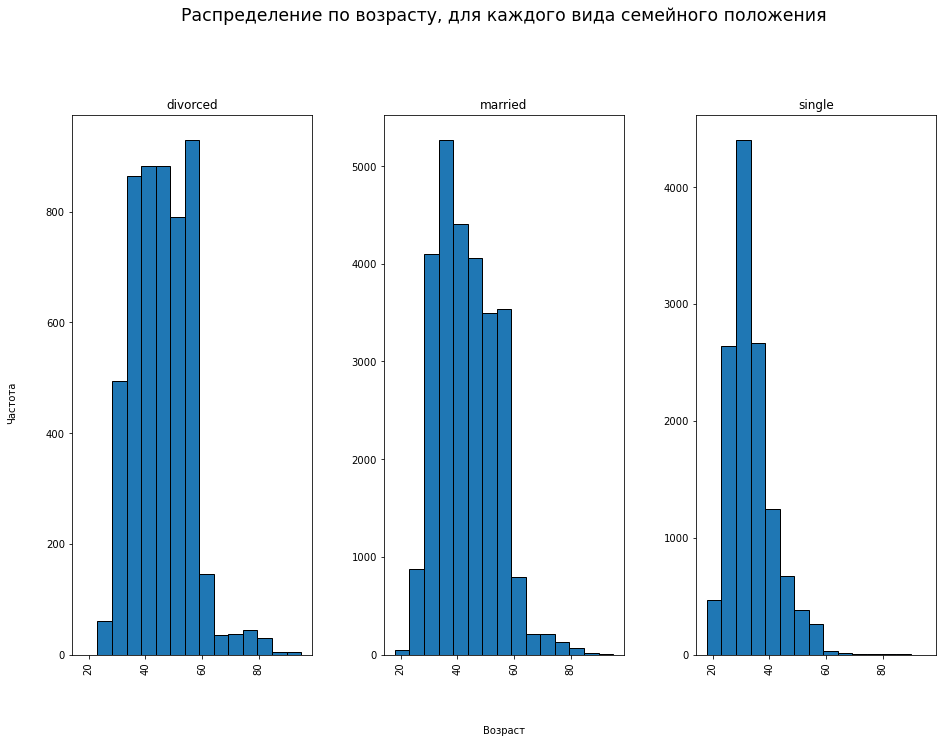

In [260]:
fig, axes = plt.subplots(figsize = (15, 10), nrows=1, ncols=3)

data.hist(column = 'age', by='marital', ax = axes, edgecolor='black', bins = np.linspace(18, 95, 16))

plt.suptitle('Распределение по возрасту, для каждого вида семейного положения', x=0.5, y=1.05, ha='center', fontsize='xx-large')
fig.text(0.5, 0.04, 'Возраст', ha='center')
fig.text(0.04, 0.5, 'Частота', va='center', rotation='vertical')

# all_marit = len(data['marital'])

# for i in data['marital'].unique():
#     print("Доля " + i + " = ", data[data['marital'] == i]['marital'].value_counts() / all_marit)

## Гистограммы выше показывают, что:
## Доля количество разведенных после 64 лет резко снижается. Пики количества разведенных людей приходятся на 38-48 лет и 54-59 лет - возможно, это связано с возрастными кризисами, которые могут происходить в эти возрастные периоды.
## Количество женатых пар достигает максимума около 33-38 лет
## Количество одиноких людей достигает максимума около 28-33 лет

## Возраст клиентов

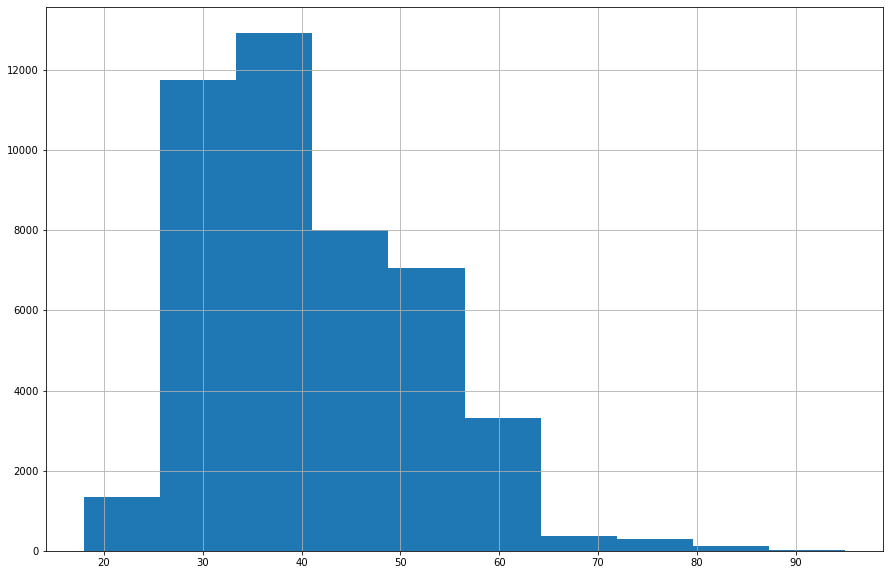

In [253]:
plt.figure(figsize = (15, 10))
data['age'].hist()
plt.show()

In [256]:
data['age'].value_counts()

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64

## Чаще всего клиенту 32 года 

## Семейное положение клиентов

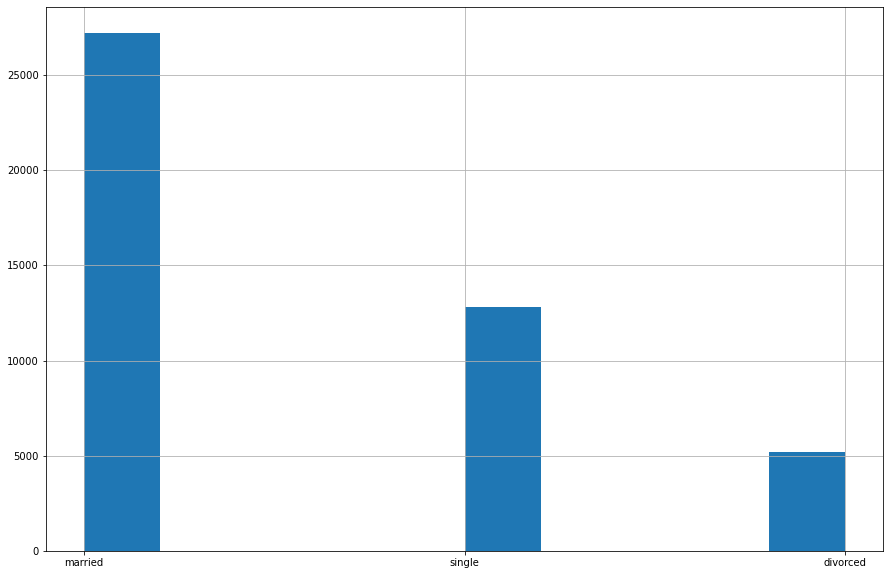

In [258]:
plt.figure(figsize = (15, 10))
data['marital'].hist()
plt.show()

In [259]:
data['marital'].value_counts() / len(data['marital'])

married     0.601933
single      0.282896
divorced    0.115171
Name: marital, dtype: float64

## Примерно 60% клиентов женаты, 28% одиноки, 12% разведены

## Образование клиентов

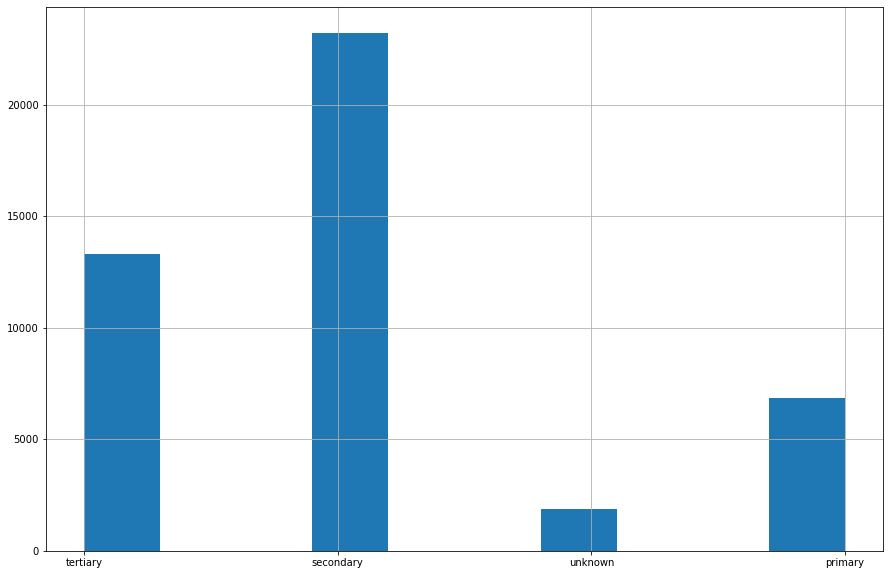

In [252]:
plt.figure(figsize = (15, 10))
data['education'].hist()
plt.show()

In [249]:
data['education'].value_counts() / len(data['education'])

secondary    0.513194
tertiary     0.294198
primary      0.151534
unknown      0.041074
Name: education, dtype: float64

## 51% клиентов имеет среднее образование, 29% имеет высшее образование, 15% - начальное образование, об остальных сведений нет

## Дефолтность

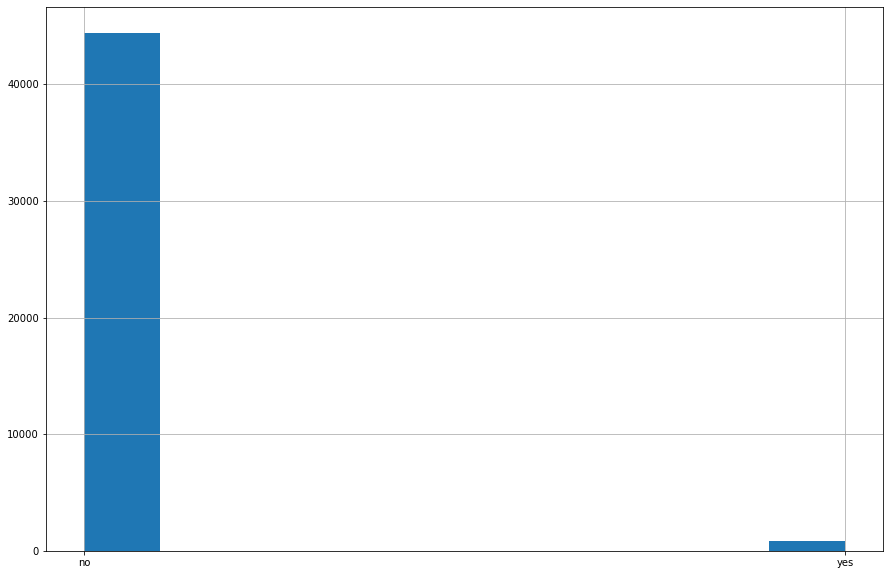

In [266]:
plt.figure(figsize = (15, 10))
data['default'].hist()
plt.show()

In [250]:
data['default'].value_counts() / len(data['default'])

no     0.981973
yes    0.018027
Name: default, dtype: float64

## 98.2% клиентов не дефолтны, 1.8% дефолтны

## Рассмотрим баланс клиентов

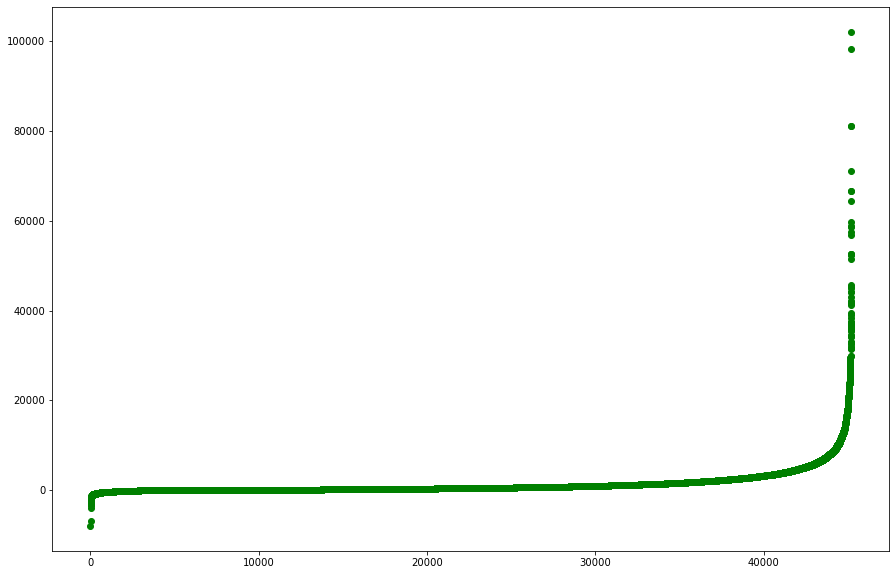

In [269]:
plt.figure(figsize = (15, 10))
plt.plot(sorted(data['balance'].values), 'go')
plt.show()

In [271]:
round(data['balance'].mean(), 2)

1362.28

## Средний баланс клиента: 1362.28

## Изучим наличие недвижимости у клиента

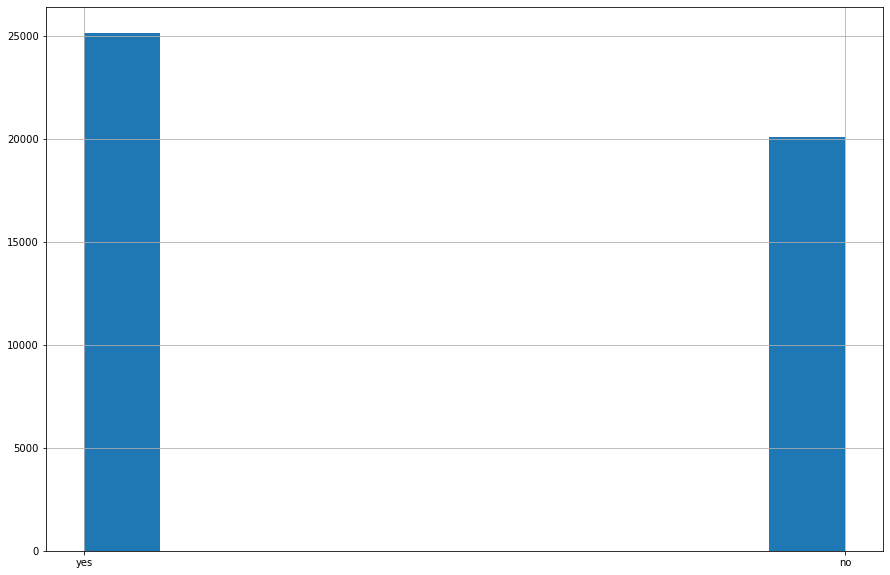

In [273]:
plt.figure(figsize = (15, 10))
data['housing'].hist()
plt.show()

In [274]:
data['housing'].value_counts() / len(data['housing'])

yes    0.555838
no     0.444162
Name: housing, dtype: float64

## Примерно у 56% клиентов есть своя недвижимость, у 44% её нет

## Проверим наличие займа у клиента, на конец периода

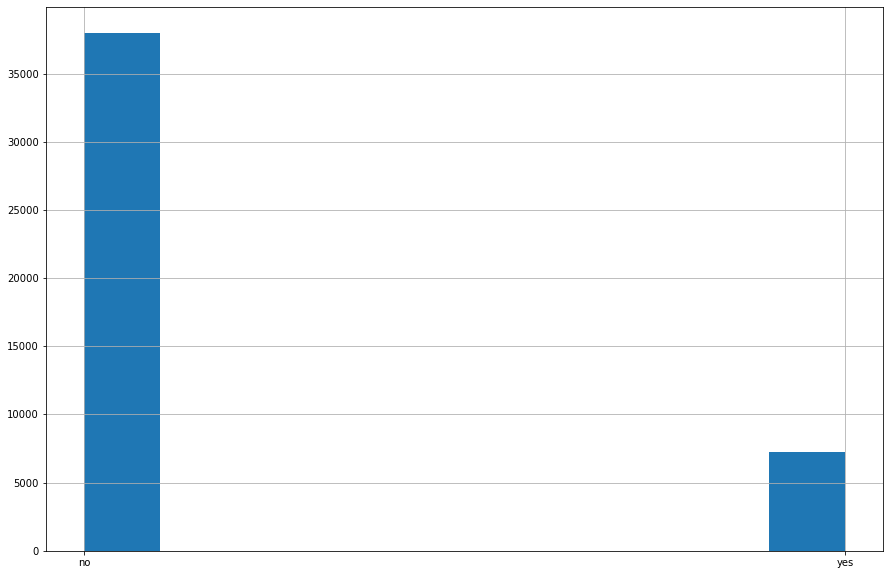

In [275]:
plt.figure(figsize = (15, 10))
data['loan'].hist()
plt.show()

In [276]:
data['loan'].value_counts() / len(data['loan'])

no     0.839774
yes    0.160226
Name: loan, dtype: float64

## Примерно у 84% клиентов нет займа, у 16% есть

## Изучим предпочтительный способ связи клиентов

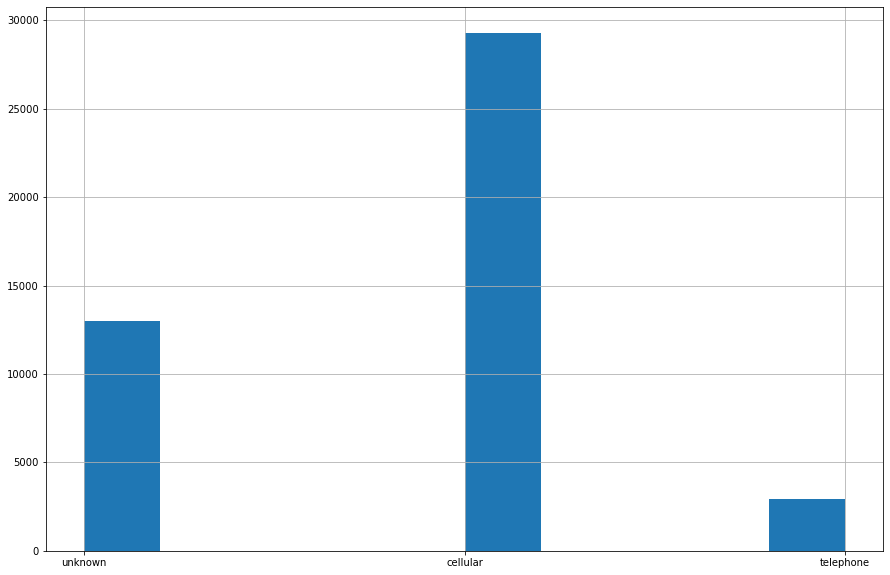

In [277]:
plt.figure(figsize = (15, 10))
data['contact'].hist()
plt.show()

In [278]:
data['contact'].value_counts() / len(data['contact'])

cellular     0.647741
unknown      0.287983
telephone    0.064276
Name: contact, dtype: float64

## Примерно 65% клиентов предпочитают сотовый, 6% предпочитают стационарный телефон, об остальных клиентах нет информации

# Часть В

In [53]:
data_to_corr = data.iloc[:, [0, -1]].drop(data[data.iloc[:, -1] == 'unknown'].index, axis = 0)
data_to_corr.head()

,age,contact
12657,27,cellular
12658,54,cellular
12659,43,cellular
12660,31,telephone
12661,27,cellular


In [54]:
data_temp = pd.DataFrame(pd.get_dummies(data_to_corr.iloc[:, -1], drop_first=True))
data_temp.head()

,telephone
12657,0
12658,0
12659,0
12660,1
12661,0


In [55]:
data_to_corr['contact'] = data_temp

## 0 - cellular (сотовый), 1 - telephone - если интерпретировать как требует английский, то это любой телефон: как стационарный, так и мобильный, так и любой другой. Однако, вероятно, имеется в виду стационарный, поэтому интерпретация будет дана исходя из этого предположения
## Для определения наличия зависимости между возрастом и предпочитаемым типом связи, разделим клиентов на возрастные группы: каждые 5 лет возраста будут определять возрастную группу. Минимальный возраст клиента - 18 лет, максимальный - 95

C:\Users\Dany\AppData\Local\Temp\ipykernel_20792\1631795541.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  age_categories.append(data_to_corr[data_to_corr['age'] >= i - 5][data_to_corr['age'] < i]['contact'])


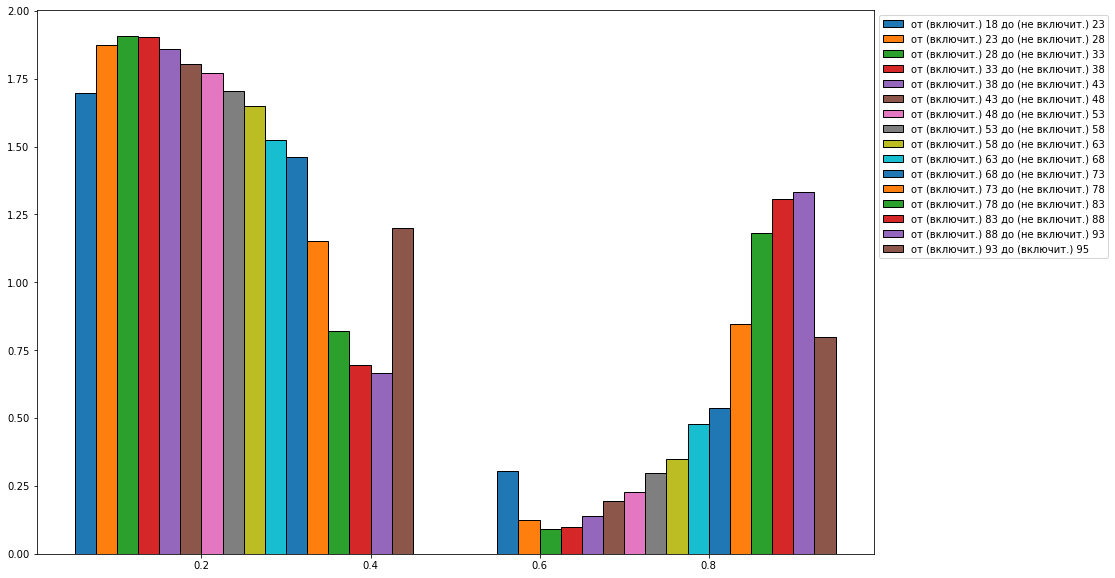

In [129]:
plt.figure(figsize = (15, 10))
bins = np.linspace(0, 1, 3)
max_age = max(data_to_corr['age'].values) #95
min_age = min(data_to_corr['age'].values) #18
step = 5
labels = []
age_categories = []

for i in range(min_age + step, max_age, step):
    age_categories.append(data_to_corr[data_to_corr['age'] >= i - 5][data_to_corr['age'] < i]['contact'])
    labels.append("от (включит.) " + str(i - 5) + " до (не включит.) " + str(i))
age_categories.append(data_to_corr[data_to_corr['age'] >= i]['contact'])
labels.append("от (включит.) " + str(i) + " до (включит.) " + str(max_age))    

plt.hist(age_categories, bins, label = labels, density=True, edgecolor='black')
plt.legend(bbox_to_anchor = (1,1))
plt.show()

In [128]:
for cat in age_categories:
    print(cat.value_counts())

0    201
1     36
Name: contact, dtype: int64
0    1832
1     121
Name: contact, dtype: int64
0    5668
1     276
Name: contact, dtype: int64
0    6409
1     327
Name: contact, dtype: int64
0    4195
1     317
Name: contact, dtype: int64
0    3573
1     385
Name: contact, dtype: int64
0    2935
1     379
Name: contact, dtype: int64
0    2435
1     424
Name: contact, dtype: int64
0    1417
1     300
Name: contact, dtype: int64
0    249
1     78
Name: contact, dtype: int64
0    185
1     68
Name: contact, dtype: int64
0    113
1     83
Name: contact, dtype: int64
1    72
0    50
Name: contact, dtype: int64
1    32
0    17
Name: contact, dtype: int64
1    6
0    3
Name: contact, dtype: int64
0    3
1    2
Name: contact, dtype: int64


## От 18 лет до 33, доля использующих сотовый телефон возрастает
## От 33 до 58, доля использующих сотовый телефон снижается до значений полуинтервала [18, 23)
## Последующие возрастные группы все меньше используют сотовый телефон в пользу стационарного
## Всплеск в конце гистограммы объясняется малым объемом выборки в возрастной группе от 93 до 95 лет включительно